# 물류 최적경로
물류에서의 문제: 여러 공장에서 생산된 물품을 여러 창고에 보관하고 어느 대리점에 몇개의 상품을 배송할 지 결정해야 하는 문제<br>
의의: 물류비용을 줄이고 효율화를 통해 회사 실적을 개선할 수 있음<br>

물류가 아니더라도 택시회사의 태시배차, 영업사원 최적화 영업경로 등 여러가지 상황에 적용할 수 있음


# Data

1. tbl_factory.csv : 생산 공장 데이터
2. tbl_warehouse.csv : 창고 데이터
3. rel_cost.csv : 창고와 공장 간의 운송 비용
4. tbl_transaction.csv : 2019년의 공장으로의 부품 운송 실적

In [15]:
import pandas as pd
# 공장
factories = pd.read_csv("./data/tbl_factory.csv",index_col=0)
factories.head()

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부


In [16]:
# 창고
warehouses = pd.read_csv('./data/tbl_warehouse.csv',index_col=0)
warehouses.head()

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부


In [24]:
# 비용
cost = pd.read_csv('./data/rel_cost.csv',index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [25]:
# 거래
trans = pd.read_csv('./data/tbl_transaction.csv',index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


## merge

In [27]:
join_data = trans.merge(cost, left_on=['ToFC','FromWH'], right_on=['FCID','WHID'])
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-04 04:43:52,FC00004,WH00003,25,FC00004,WH00003,1.1
2,2019-01-06 07:01:42,FC00004,WH00003,37,FC00004,WH00003,1.1
3,2019-01-08 08:47:05,FC00004,WH00003,24,FC00004,WH00003,1.1
4,2019-01-09 00:12:40,FC00004,WH00003,33,FC00004,WH00003,1.1


In [28]:
join_data = join_data.merge(factories, left_on=['ToFC'],right_on=['FCID'],how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-04 04:43:52,FC00004,WH00003,25,FC00004,WH00003,1.1,대전공장,25,북부
2,2019-01-06 07:01:42,FC00004,WH00003,37,FC00004,WH00003,1.1,대전공장,25,북부
3,2019-01-08 08:47:05,FC00004,WH00003,24,FC00004,WH00003,1.1,대전공장,25,북부
4,2019-01-09 00:12:40,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부


In [29]:
join_data = join_data.merge(warehouses, left_on=['FromWH'],right_on=['WHID'])
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부
1,2019-01-04 04:43:52,FC00004,WH00003,25,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부
2,2019-01-06 07:01:42,FC00004,WH00003,37,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부
3,2019-01-08 08:47:05,FC00004,WH00003,24,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부
4,2019-01-09 00:12:40,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부


In [30]:
join_data = join_data[['TransactionDate', 'Quantity', 'Cost','ToFC','FCName','FCDemand','FromWH','WHName','WHSupply','WHRegion' ]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-04 04:43:52,25,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
2,2019-01-06 07:01:42,37,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-08 08:47:05,24,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
4,2019-01-09 00:12:40,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부


## 북부, 남부 데이터

In [31]:
# 북부데이터
north = join_data.loc[join_data['WHRegion']=='북부']
north.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-04 04:43:52,25,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
2,2019-01-06 07:01:42,37,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-08 08:47:05,24,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
4,2019-01-09 00:12:40,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부


In [32]:
# 남부데이터
south = join_data.loc[join_data['WHRegion']=='남부']
south.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
721,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
722,2019-01-04 20:59:44,30,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
723,2019-01-05 18:11:00,25,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
724,2019-01-06 11:45:59,22,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
725,2019-01-06 22:14:53,24,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부


# 운송량, 운송비용 분석

In [34]:
# 총 운송비용
print(f"북부지사 총비용: {north['Cost'].sum()}")
print(f"남부지사 총비용: {south['Cost'].sum()}")

북부지사 총비용: 2189.3
남부지사 총비용: 2062.0


In [36]:
# 총 운송량
print(f"북부지사 총부품 운송개수: {north['Quantity'].sum()}")
print(f"남부지사 총부품 운송개수: {south['Quantity'].sum()}")

북부지사 총부품 운송개수: 49146
남부지사 총부품 운송개수: 50214


In [53]:
# 부품 1개당 운송비용
tmp = (north['Cost'].sum()/north['Quantity'].sum())*10000
print(f"북부지사의 부품1개당 비용: {int(tmp)}원")

tmp = (south['Cost'].sum()/south['Quantity'].sum())*10000
print(f"북부지사의 부품1개당 비용: {int(tmp)}원")

북부지사의 부품1개당 비용: 445원
북부지사의 부품1개당 비용: 410원


In [54]:
# 비용을 지사별로 집계
cost_chk = pd.merge(cost,factories, on="FCID",how="left")
cost_chk

,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,FC00001,WH00001,0.4,서울공장,28,북부
1,FC00001,WH00002,0.8,서울공장,28,북부
2,FC00001,WH00003,1.5,서울공장,28,북부
3,FC00002,WH00001,0.9,수원공장,29,북부
4,FC00002,WH00002,0.8,수원공장,29,북부
5,FC00002,WH00003,1.6,수원공장,29,북부
6,FC00003,WH00001,1.2,인천공장,31,북부
7,FC00003,WH00002,1.3,인천공장,31,북부
8,FC00003,WH00003,1.5,인천공장,31,북부
9,FC00004,WH00001,0.8,대전공장,25,북부


In [59]:
# 평균
# 남부지사가 더 효율적으로 운송하고 있다는 것을 알 수 있다
# 내생각: 거리를 생각하지 않고 단순히 효율적이라고 할 수 있는지 잘 모르겠다
avg_n = cost_chk.loc[cost_chk['FCRegion']=='북부','Cost'].mean()
avg_s = cost_chk.loc[cost_chk['FCRegion']=='남부','Cost'].mean()
print(f"북부지사의 평균운송비용: {avg_n}")
print(f"남부지사의 평균운송비용: {avg_s}")

북부지사의 평균운송비용: 1.075
남부지사의 평균운송비용: 1.05


# 네트워크 practice

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

## basic

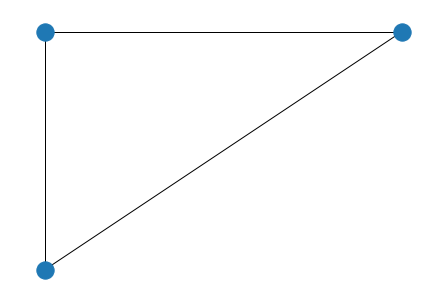

In [61]:
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 엣지 설정
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

# 좌표설정
pos= {}
pos["nodeA"] = (0,0)
pos["nodeB"] = (1,1)
pos["nodeC"] = (0,1)

# 그리기
nx.draw(G,pos)
plt.show()

## 노드 추가하기

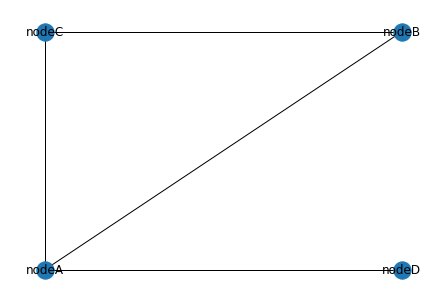

In [64]:
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

# 엣지 설정
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")
G.add_edge("nodeA", "nodeD")

# 좌표설정
pos= {}
pos["nodeA"] = (0,0)
pos["nodeB"] = (1,1)
pos["nodeC"] = (0,1)
pos["nodeD"] = (1,0)

# 그리기
nx.draw(G,pos,with_labels=True)
plt.show()

## 경로에 가중치 부여

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [67]:
# 위치, 가중치 데이터
df_w = pd.read_csv("./data/network_weight.csv")
df_w.head()

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [68]:
df_p = pd.read_csv("./data/network_pos.csv")
df_p.head()

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [70]:
# 엣지 가중치 리스트화
size = 10
edge_weight = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weight.append(df_w.iloc[i][j]* size)
edge_weight

[6.39921,
 1.4335300000000002,
 9.44669,
 5.21848,
 0.0,
 2.64556,
 0.0,
 4.5615,
 5.68434,
 0.0,
 6.17635,
 6.12096,
 6.16934,
 9.43748,
 0.0,
 0.0,
 0.0,
 6.97631,
 0.60225,
 6.66767,
 6.706379999999999,
 2.10383,
 0.0,
 3.15428,
 0.0]

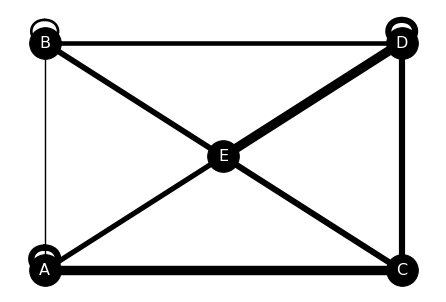

In [72]:
# 그래프 그리기
G = nx.Graph()

# 노드 설정
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
# 엣지 설정 (A->B, A->C ..)
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i],df_w.columns[j])
        
# 좌표설정
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])
    
# 그리기
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weight)

# 표시
plt.show()

# 운송경로 분석

In [82]:
# 운송경로 정보
# 어느 창고에서 어느 공장으로 어느 정도의 양을 운송했는지
df_tr = pd.read_csv('./data/trans_route.csv', index_col='공장')
df_tr.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [83]:
# 공장, 창고 좌표
df_pos = pd.read_csv('./data/trans_route_pos.csv')
df_pos.head()

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


In [84]:
# 객체
G = nx.Graph()

# 노드 설정
for i in range(len(df_pos)):
    G.add_node(df_pos.columns[i])

# 엣지 설정 및 가중치 리스트화
num_pre = 0
edge_weights = []
size = 0.1

for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j): # 같은 곳 아닐 때
            # 엣지 추가(W1 -> W2, W1->F1 ...)
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
print(G.edges)

[('W1', 'W2'), ('W1', 'W3'), ('W1', 'F1'), ('W1', 'F2'), ('W1', 'F3'), ('W1', 'F4'), ('W2', 'W3'), ('W2', 'F1'), ('W2', 'F2'), ('W2', 'F3'), ('W2', 'F4'), ('W3', 'F1'), ('W3', 'F2'), ('W3', 'F3'), ('W3', 'F4'), ('F1', 'F2'), ('F1', 'F3'), ('F1', 'F4'), ('F2', 'F3'), ('F2', 'F4'), ('F3', 'F4')]


In [96]:
# 객체
G = nx.Graph()

# 노드 설정
for i in range(len(df_pos)):
    G.add_node(df_pos.columns[i])
    
# 엣지 설정 및 가중치 리스트화
# 코드를 너무 복잡하게 짠거 같다
num_pre = 0
edge_weights = []
size = 0.1

for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j): # 같은 곳 아닐 때
            # 엣지 추가(W1 -> W2, W1->F1 ...)
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            print("G edge수:", len(G.edges))
            # 엣지 가중치 추가
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                node1 = df_pos.columns[i]
                node2 = df_pos.columns[j]
                print("node: ",node1,node2)
                if (node1 in df_tr.columns) and (node2 in df_tr.index):
                    print("운송량: ",df_tr[node1][node2])
                    if df_tr[node1][node2]:
                        weight = df_tr[node1][node2] * size
                elif (node2 in df_tr.columns) and (node1 in df_tr.index):
                    print("운송량: ",df_tr[node2][node1])
                    if df_tr[node2][node1]:
                        weight = df_tr[node2][node1]* size
                edge_weight.append(weight)
print(edge_weight,end=' ')

G edge수: 1
node:  W1 W2
G edge수: 2
node:  W1 W3
G edge수: 3
node:  W1 F1
운송량:  15
G edge수: 4
node:  W1 F2
운송량:  15
G edge수: 5
node:  W1 F3
운송량:  0
G edge수: 6
node:  W1 F4
운송량:  5
G edge수: 6
G edge수: 7
node:  W2 W3
G edge수: 8
node:  W2 F1
운송량:  5
G edge수: 9
node:  W2 F2
운송량:  0
G edge수: 10
node:  W2 F3
운송량:  30
G edge수: 11
node:  W2 F4
운송량:  5
G edge수: 11
G edge수: 11
G edge수: 12
node:  W3 F1
운송량:  10
G edge수: 13
node:  W3 F2
운송량:  15
G edge수: 14
node:  W3 F3
운송량:  2
G edge수: 15
node:  W3 F4
운송량:  15
G edge수: 15
G edge수: 15
G edge수: 15
G edge수: 16
node:  F1 F2
G edge수: 17
node:  F1 F3
G edge수: 18
node:  F1 F4
G edge수: 18
G edge수: 18
G edge수: 18
G edge수: 18
G edge수: 19
node:  F2 F3
G edge수: 20
node:  F2 F4
G edge수: 20
G edge수: 20
G edge수: 20
G edge수: 20
G edge수: 20
G edge수: 21
node:  F3 F4
G edge수: 21
G edge수: 21
G edge수: 21
G edge수: 21
G edge수: 21
G edge수: 21
[6.39921, 1.4335300000000002, 9.44669, 5.21848, 0.0, 2.64556, 0.0, 4.5615, 5.68434, 0.0, 6.17635, 6.12096, 6.16934, 9.43748, 0.0, 0

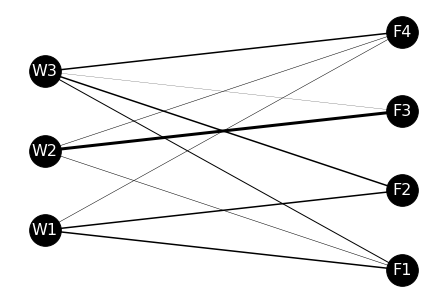

In [95]:
# 전체 코드
# 객체
G = nx.Graph()

# 노드 설정
for i in range(len(df_pos)):
    G.add_node(df_pos.columns[i])
    
# 엣지 설정 및 가중치 리스트화
# 책에서 코드를 너무 복잡하게 짠거 같다
num_pre = 0
edge_weights = []
size = 0.1

for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j): # 같은 곳 아닐 때
            # 엣지 추가(W1 -> W2, W1->F1 ...)
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
#             print("G edge수:", len(G.edges))
            # 엣지 가중치 추가
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                node1 = df_pos.columns[i]
                node2 = df_pos.columns[j]
#                 print("node: ",node1,node2)
                if (node1 in df_tr.columns) and (node2 in df_tr.index):
#                     print("운송량: ",df_tr[node1][node2])
                    if df_tr[node1][node2]:
                        weight = df_tr[node1][node2] * size
                elif (node2 in df_tr.columns) and (node1 in df_tr.index):
#                     print("운송량: ",df_tr[node2][node1])
                    if df_tr[node2][node1]:
                        weight = df_tr[node2][node1]* size
                edge_weights.append(weight)

# 좌표 설정
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])
    
# 그리기
nx.draw(G, pos, with_labels=True, font_size= 16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

## 자체 수정 코드

# 운송 비용 함수
운송최적화 문제: <br>
1. 최소,최대화 하고 싶은 것을 함수로 정의(목적함수)<br>
2. 지켜야할 조건 정의(제약함수)<br>

위의 운송경로 시각화를 통해 "운송비용을 낮출 효율적인 운송 경로가 존재한다" 라고 가설을 세울 수 있음<br>
가설 입증과 운송 경로 최적화를 해보는 과정

In [97]:
# 운송량
df_tr = pd.read_csv("./data/trans_route.csv", index_col='공장')
df_tr.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [98]:
# 운송 비용
df_tc = pd.read_csv('./data/trans_cost.csv', index_col='공장')
df_tc.head()

,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


## 목적함수

In [99]:
df_tr * df_tc

,F1,F2,F3,F4
공장,,,,
W1,150,150,0,135
W2,90,0,360,70
W3,150,180,28,180


In [101]:
(df_tr * df_tc).sum().sum()

1493

In [102]:
# 운송비용 함수
def trans_cost(df_tr,df_tc):
    df_multiple = df_tr * df_tc
    cost = df_multiple.sum().sum()
    return cost

## 제약함수

In [103]:
# 수요(부품을 가져와야 함)
# 각 생산공장의 채워야 할 제품 제조량
df_demand = pd.read_csv('./data/demand.csv')
df_demand.head()

,F1,F2,F3,F4
0,28,29,31,25


In [104]:
# 각 부품창고마다 공급 가능한 부품 수
df_supply = pd.read_csv('./data/supply.csv')
df_supply.head()

,W1,W2,W3
0,35,41,42


In [112]:
# 수요측 제약조건
for f in range(len(df_demand.columns)):
    factory = df_demand.columns[f]
    temp_sum = sum(df_tr[df_demand.columns[f]])
    demand = df_demand.iloc[0][f]
    print(f"생산공장 {factory}으로 운송량: {temp_sum}, 채워야 할 제조량(수요량): {demand}")
    if temp_sum>=demand:
        print("수요량 만족시키고 있음")
    else:
        print("수요량을 만족시키지 못하고 있음, 운송경로 재계산 필요")

생산공장 F1으로 운송량: 30, 채워야 할 제조량(수요량): 28
수요량 만족시키고 있음
생산공장 F2으로 운송량: 30, 채워야 할 제조량(수요량): 29
수요량 만족시키고 있음
생산공장 F3으로 운송량: 32, 채워야 할 제조량(수요량): 31
수요량 만족시키고 있음
생산공장 F4으로 운송량: 25, 채워야 할 제조량(수요량): 25
수요량 만족시키고 있음


In [138]:
# 공급 측 제약조건
for w in range(len(df_supply.columns)):
    warehouse = df_supply.columns[w]
    temp_sum = df_tr.loc[warehouse].sum()
    supply = df_supply.iloc[0][w]
    print(f"부품창고 {warehouse}으로 운송량: {temp_sum}, 공급 가능한 부품 수(공급량): {supply}")
    if temp_sum <= supply:
        print("공급 한계 범위내")
    else:
        print("공급한계 초과, 운송경로 재계산 필요")

부품창고 W1으로 운송량: 35, 공급 가능한 부품 수(공급량): 35
공급 한계 범위내
부품창고 W2으로 운송량: 40, 공급 가능한 부품 수(공급량): 41
공급 한계 범위내
부품창고 W3으로 운송량: 42, 공급 가능한 부품 수(공급량): 42
공급 한계 범위내


## 운송경로를 변경하여 운송비용 함수 변화 확인

In [139]:
# W1->F4를 줄이고 그만큼을 W2->F4 로 옮김
df_tr_new = pd.read_csv('./data/trans_route_new.csv',index_col='공장')
df_tr_new.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [141]:
# 운송비용
cost = trans_cost(df_tr, df_tc)
cost_new = trans_cost(df_tr_new, df_tc)
print(f"이전 운송비용: {cost}원")
print(f"새로운 운송비용: {cost_new}원")

이전 운송비용: 1493원
새로운 운송비용: 1428원


In [172]:
# 제약조건 함수
# 수요측
def condition_demand(df_tr,df_demand):
    flag= np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if temp_sum >= df_demand.iloc[0][i]:
            flag[i]=1
    return flag
        
# 공급측
def condition_supply(df_tr,df_supply):
    flag= np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i]=1
    return flag

In [173]:
print("수요조건 만족 여부: ", condition_demand(df_tr_new,df_demand))
print("공급조건 만족 여부: ", condition_supply(df_tr_new,df_supply))

수요조건 만족 여부:  [1. 1. 1. 1.]
공급조건 만족 여부:  [1. 0. 1.]
